In [1]:
# The code was removed by Watson Studio for sharing.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

# Description of the problem and a discussion of the background.

## Problem

The State of Los Angles has statistics about his population by ZIP code. Some resident of this city wants to know which could be the best zip code for opening a new store. So the problem is about look the best top 10 ZIP codes in order to let him know where could be the best place for opening a new business. He doesn't have any prefence about the kind of business, so it could be any type of Venue.

# Description of the data and how it will be used to solve the problem.
### Data sources

#### Los Angeles has a Open Data web site available from where we are going to get the follwing two datasets. The Venues are going to be collected using Foursquare API.

<b>Dataset 1.</b>
<br />Population data regarded from 2010 census grouped by ZIP code (https://catalog.data.gov).

<b>Dataset 2.</b>
<br />ZIP codes with it's Latitude and Longitude value (https://catalog.data.gov).

<b>Dataset 3.</b>
<br />Foursquare.com will provide us with the quantity of Venues registered on their database that will be query using latitude and longitude for each Zip Code ( https://foursquare.com/ ). 


### How Solve the problem.

Once we have Venues per Zip Code, we will check if there any relation between population and quantity of Venues. In order to do that we will make a simple projection of the population using yearly growth rate found in the web site http://worldpopulationreview.com/us-counties/ca/los-angeles-county-population/ , and then apply some techniques such as PCA, ANOVA and confusion matrix.
<br />
<br /> After have the estimate population, some models will be applying over final dataset, and the best model performance is going to be selected depending of the test results. Once the moldel is selected, a new prjection will be done in order to know what will be cluster with more growth in the next 2 years, and that cluster shall be the suggest within their zip codes. 

In [2]:
#census = pd.read_csv('https://data.lacity.org/api/views/nxs9-385f/rows.csv?accessType=DOWNLOAD')
#census.to_csv('census.csv')
#census = pd.read_csv('census.csv')
#project.save_data("census.csv", census.to_csv())

In [147]:
# The code was removed by Watson Studio for sharing.

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [4]:
#zip_codes = pd.read_csv('https://data.lacity.org/api/views/4ca8-mxuh/rows.csv?accessType=DOWNLOAD',low_memory=False)
#zip_codes.to_csv('la_venues.csv')
#project.save_data("zip_codes.csv", zip_codes.to_csv())
#zip_codes = pd.read_csv('zip_codes.csv',low_memory=False)
#zip_codes.head()

In [146]:
# The code was removed by Watson Studio for sharing.

,HSE_ID,PIN,PIND,HSE_NBR,HSE_FRAC_NBR,HSE_DIR_CD,STR_NM,STR_SFX_CD,STR_SFX_DIR_CD,UNIT_RANGE,ZIP_CD,LAT,LON,X_COORD_NBR,Y_COORD_NBR,ASGN_STTS_IND,ENG_DIST,CNCL_DIST
0,1,153B165 544,153B165-544,8640,NaN,W,MULHOLLAND,DR,NaN,NaN,90210,34.12014,-118.39278,6.442784e+06,1.866335e+06,U,W,4.0
1,2,153B165 544,153B165-544,8686,NaN,W,EDWIN,DR,NaN,NaN,90046,34.12017,-118.39228,6.442938e+06,1.866344e+06,A,W,4.0
2,4,153B169 13,153B169-13,8250,NaN,W,SKYLINE,DR,NaN,NaN,90046,34.11992,-118.38966,6.443731e+06,1.866253e+06,A,W,4.0
3,5,156A181 4,156A181-4,2909,NaN,N,PASSMORE,DR,NaN,NaN,90068,34.12373,-118.35147,6.455294e+06,1.867597e+06,U,V,4.0
4,6,156A181 7,156A181-7,7321,NaN,W,WOODROW WILSON,DR,NaN,NaN,90046,34.12355,-118.35299,6.454833e+06,1.867531e+06,A,V,4.0


In [6]:
zip_90001 = zip_codes[zip_codes['ZIP_CD'] == 90001]
zip_90001 = zip_90001[['ZIP_CD','LAT', 'LON']]
zip_90001.head()

,ZIP_CD,LAT,LON
410522,90001,33.96327,-118.26094
410523,90001,33.96298,-118.26110
410524,90001,33.96298,-118.26123
410525,90001,33.96298,-118.26114
410526,90001,33.96298,-118.26136


### Data Results:

The <b>zip_90001</b> combined with <b>census</b> dataset will provide the population with it's latitude and longude, and then using python code the populition will be raise until 2018 using the following growth rates per year: 
<ul style="list-style-type:none;">
  <li>2011 - 0.63%</li>
  <li>2012 - 0.71%</li>
  <li>2013 - 0.63%</li>
  <li>2014 - 0.54%</li>
  <li>2015 - 0.50%</li>    
  <li>2016 - 0.27%</li>   
  <li>2017 - 0.13%</li>  
  <li>2018 - 0.06%</li>  
</ul>

<br />
The latest estimation of Los Angeles population is 4,054,400, so the total population value obteined after projection, should be fit around that value. 
<br /> Source: http://www.dof.ca.gov/Forecasting/Demographics/Estimates/e-1/documents/E-1_2018PressRelease.pdf



In [7]:
census.sum()

Zip Code                  29029215.00
Total Population          10603988.00
Median Age                   11652.30
Total Males                5228909.00
Total Females              5375079.00
Total Households           3497698.00
Average Household Size         902.17
dtype: float64

In [8]:
LA_city_zip_codes = np.arange(90001,90104,1)

In [9]:
a = LA_city_zip_codes
a = np.delete(a,68)
a = np.delete(a,83)
a = np.delete(a,87)
a = np.delete(a,88)
a = np.delete(a,89)
a = np.delete(a,91)
a = np.delete(a,91)
a = np.delete(a,92)
a = np.delete(a,93)
a = np.insert(a, 94, 90189)
LA_city_zip_codes = a
LA_city_zip_codes

array([90001, 90002, 90003, 90004, 90005, 90006, 90007, 90008, 90009,
       90010, 90011, 90012, 90013, 90014, 90015, 90016, 90017, 90018,
       90019, 90020, 90021, 90022, 90023, 90024, 90025, 90026, 90027,
       90028, 90029, 90030, 90031, 90032, 90033, 90034, 90035, 90036,
       90037, 90038, 90039, 90040, 90041, 90042, 90043, 90044, 90045,
       90046, 90047, 90048, 90049, 90050, 90051, 90052, 90053, 90054,
       90055, 90056, 90057, 90058, 90059, 90060, 90061, 90062, 90063,
       90064, 90065, 90066, 90067, 90068, 90070, 90071, 90072, 90073,
       90074, 90075, 90076, 90077, 90078, 90079, 90080, 90081, 90082,
       90083, 90084, 90086, 90087, 90088, 90089, 90091, 90093, 90095,
       90096, 90099, 90101, 90103, 90189])

In [10]:
pf_zc_la = pd.DataFrame(LA_city_zip_codes)
pf_zc_la.columns = ['Zip Code']
pf_zc_la.head()

,Zip Code
0,90001
1,90002
2,90003
3,90004
4,90005


In [11]:
pf_zc_la
census_la_city = pd.merge(census, pf_zc_la, on='Zip Code', how='inner')
census_la_city.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,90001,57110,26.6,28468,28642,12971,4.40
1,90002,51223,25.5,24876,26347,11731,4.36
2,90003,66266,26.3,32631,33635,15642,4.22
3,90004,62180,34.8,31302,30878,22547,2.73
4,90005,37681,33.9,19299,18382,15044,2.50


In [12]:
census_la_city.sum()

Zip Code                  5852416.00
Total Population          2378448.00
Median Age                   2255.40
Total Males               1186070.00
Total Females             1192378.00
Total Households           821015.00
Average Household Size        172.38
dtype: float64

In [13]:
rate = 4054400 / 2378448 
growth_mult = (rate)
census_la_city['Total Population'] = census_la_city['Total Population']*growth_mult
census_la_city['Total Males'] = census_la_city['Total Males']*growth_mult
census_la_city['Total Females'] = census_la_city['Total Females']*growth_mult
census_la_city.drop(['Total Households', 'Average Household Size','Median Age'], axis=1, inplace = True)
census_la_city.sum()

Zip Code            5.852416e+06
Total Population    4.054400e+06
Total Males         2.021824e+06
Total Females       2.032576e+06
dtype: float64

## Now let's choice center of each Zip_Code

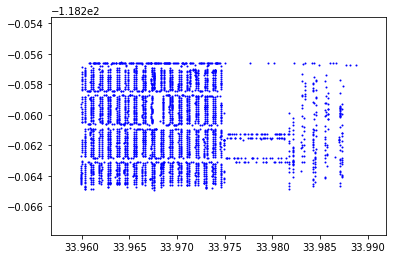

In [14]:
zip_90001 = zip_codes[zip_codes['ZIP_CD']== 90001]
zip_90001 = zip_90001[['ZIP_CD', 'LAT','LON']]
Latitude = zip_90001['LAT']
Longitude =zip_90001 ['LON']
plt.scatter(Latitude, Longitude, s= 1 , c='b')

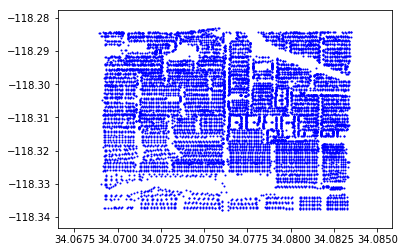

In [15]:
zip_90004 = zip_codes[zip_codes['ZIP_CD']== 90004]
zip_90004 = zip_90004[['ZIP_CD', 'LAT','LON']]
Latitude = zip_90004['LAT']
Longitude =zip_90004 ['LON']
plt.scatter(Latitude, Longitude, s= 1 , c='b')

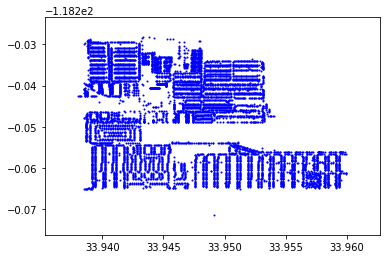

In [16]:
zip_90023 = zip_codes[zip_codes['ZIP_CD']== 90002]
zip_90023 = zip_90023[['ZIP_CD', 'LAT','LON']]
Latitude = zip_90023['LAT']
Longitude =zip_90023 ['LON']
plt.scatter(Latitude, Longitude, s= 1 , c='b')

In [17]:
census_la_city.head()

,Zip Code,Total Population,Total Males,Total Females
0,90001,97352.048058,48527.720261,48824.327797
1,90002,87316.826435,42404.649755,44912.176680
2,90003,112959.741142,55624.140784,57335.600358
3,90004,105994.577977,53358.672882,52635.905094
4,90005,64232.577883,32897.866844,31334.711038


In [18]:
#zip_codes.columns = ['Zip Code']
zc = zip_codes[['ZIP_CD','LAT','LON']]
zc.columns = ['Zip Code','Latitude', 'Longitude']
zc.head()

,Zip Code,Latitude,Longitude
0,90210,34.12014,-118.39278
1,90046,34.12017,-118.39228
2,90046,34.11992,-118.38966
3,90068,34.12373,-118.35147
4,90046,34.12355,-118.35299


In [19]:
zc2 = zc.groupby('Zip Code', as_index = False).median()

zc2.head()

,Zip Code,Latitude,Longitude
0,90001,33.96833,-118.26064
1,90002,33.94683,-118.24687
2,90003,33.96517,-118.27371
3,90004,34.07698,-118.30564
4,90005,34.05860,-118.30432


In [20]:
zip_la = pd.merge(zc2, census_la_city, on='Zip Code', how='inner')
zip_la.shape

(61, 6)

In [21]:
zip_la.head()

,Zip Code,Latitude,Longitude,Total Population,Total Males,Total Females
0,90001,33.96833,-118.26064,97352.048058,48527.720261,48824.327797
1,90002,33.94683,-118.24687,87316.826435,42404.649755,44912.176680
2,90003,33.96517,-118.27371,112959.741142,55624.140784,57335.600358
3,90004,34.07698,-118.30564,105994.577977,53358.672882,52635.905094
4,90005,34.05860,-118.30432,64232.577883,32897.866844,31334.711038


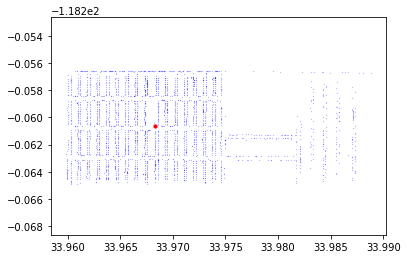

In [22]:
Latitude = zip_la.iloc[0].Latitude
Longitude =zip_la.iloc[0].Longitude
plt.scatter(Latitude, Longitude, s= 10 , c='r')
zip_90001 = zip_codes[zip_codes['ZIP_CD']== 90001]
zip_90001 = zip_90001[['ZIP_CD', 'LAT','LON']]
Latitude = zip_90001['LAT']
Longitude =zip_90001 ['LON']
plt.scatter(Latitude, Longitude, s= 0.01 , c='b')

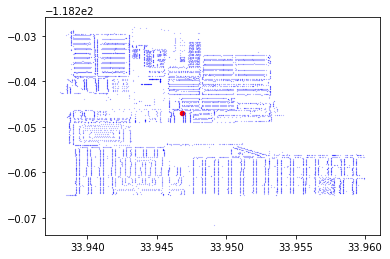

In [23]:
Latitude = zip_la.iloc[1].Latitude
Longitude =zip_la.iloc[1].Longitude
plt.scatter(Latitude, Longitude, s= 20 , c='r')
zip_90002 = zip_codes[zip_codes['ZIP_CD']== 90002]
zip_90002 = zip_90002[['ZIP_CD', 'LAT','LON']]
Latitude = zip_90002['LAT']
Longitude =zip_90002 ['LON']
plt.scatter(Latitude, Longitude, s= 0.01 , c='b')

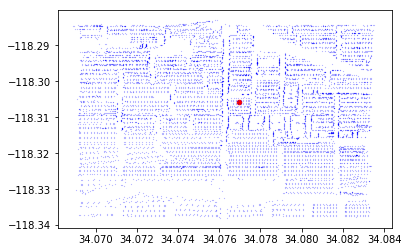

In [24]:
Latitude = zip_la.iloc[3].Latitude
Longitude =zip_la.iloc[3].Longitude
plt.scatter(Latitude, Longitude, s= 20 , c='r')
zip_90004 = zip_codes[zip_codes['ZIP_CD']== 90004]
zip_90004 = zip_90004[['ZIP_CD', 'LAT','LON']]
Latitude = zip_90004['LAT']
Longitude =zip_90004 ['LON']
plt.scatter(Latitude, Longitude, s= 0.01 , c='b')

In [25]:
df = zip_la
df.head()

,Zip Code,Latitude,Longitude,Total Population,Total Males,Total Females
0,90001,33.96833,-118.26064,97352.048058,48527.720261,48824.327797
1,90002,33.94683,-118.24687,87316.826435,42404.649755,44912.176680
2,90003,33.96517,-118.27371,112959.741142,55624.140784,57335.600358
3,90004,34.07698,-118.30564,105994.577977,53358.672882,52635.905094
4,90005,34.05860,-118.30432,64232.577883,32897.866844,31334.711038


In [26]:
df.rename(columns={"Zip Code": "Zip_code"}, inplace = True)

In [27]:
lat = 34.05223
lon = -118.24368
la_map = folium.Map(location=[lat, lon], zoom_start=11)

zips = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df.Latitude, df.Longitude):
    zips.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df.Latitude)
longitudes = list(df.Longitude)
labels = list(df.Zip_code.apply(str))

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(la_map)    
    
# add incidents to map
la_map.add_child(zips)

In [28]:
# The code was removed by Watson Studio for sharing.

In [29]:
# The code was removed by Watson Studio for sharing.

In [30]:
#la_venues = getNearbyVenues(names=df['Zip_code'].apply(str),
#                                   latitudes=df['Latitude'],
#                                   longitudes=df['Longitude']
#                                  )

In [31]:
# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save in your object storage as a csv file
#project.save_data("la_venues2.csv", la_venues.to_csv())

In [32]:
#la_venues.to_csv('la_venues.csv')

In [33]:
#la_venues = pd.read_csv('la_venues.csv')

In [148]:
# The code was removed by Watson Studio for sharing.

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,90001,33.96833,-118.26064,Polo Loco,33.965819,-118.260294,American Restaurant
1,90001,33.96833,-118.26064,Mi Lindo Nayarit,33.969612,-118.256263,Seafood Restaurant
2,90001,33.96833,-118.26064,"Selena ""Anything for Selenas"" Mural",33.970580,-118.256079,Street Art
3,90002,33.94683,-118.24687,SUBWAY,33.943692,-118.244644,Sandwich Place
4,90002,33.94683,-118.24687,Chase Bank,33.943535,-118.246737,Bank


In [35]:
la_venues.head()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,90001,33.96833,-118.26064,Polo Loco,33.965819,-118.260294,American Restaurant
1,90001,33.96833,-118.26064,Mi Lindo Nayarit,33.969612,-118.256263,Seafood Restaurant
2,90001,33.96833,-118.26064,"Selena ""Anything for Selenas"" Mural",33.970580,-118.256079,Street Art
3,90002,33.94683,-118.24687,SUBWAY,33.943692,-118.244644,Sandwich Place
4,90002,33.94683,-118.24687,Chase Bank,33.943535,-118.246737,Bank


In [36]:
la_venues.groupby('Venue Category').count()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,3,3,3,3,3,3
Accessories Store,3,3,3,3,3,3
American Restaurant,23,23,23,23,23,23
Antique Shop,1,1,1,1,1,1
Arcade,3,3,3,3,3,3
Art Gallery,6,6,6,6,6,6
Art Museum,2,2,2,2,2,2
Arts & Crafts Store,5,5,5,5,5,5
Asian Restaurant,15,15,15,15,15,15


## Too many categories, so let's aggregate some of them.

In [37]:
categories = la_venues[['Venue Category','Zip_code']].groupby('Venue Category', as_index = False, axis=0).count()
categories.drop(columns=['Zip_code'],axis=0, inplace=True)
categories.head()

,Venue Category
0,ATM
1,Accessories Store
2,American Restaurant
3,Antique Shop
4,Arcade


In [38]:
categories['Parent Category'] = categories[['Venue Category']]
categories.head()

,Venue Category,Parent Category
0,ATM,ATM
1,Accessories Store,Accessories Store
2,American Restaurant,American Restaurant
3,Antique Shop,Antique Shop
4,Arcade,Arcade


In [149]:
# The code was removed by Watson Studio for sharing.

,Venue Category
Parent Category,
Business Services,7
Entertainment,18
Food,68
Liqueur,15
Personal Services,24
Public Venue,26
Rental Services,7
Store,65


In [40]:
categories.head()

,Venue Category,Parent Category
0,ATM,Business Services
1,Accessories Store,Store
2,American Restaurant,Food
3,Antique Shop,Store
4,Arcade,Store


In [41]:
df_venues = pd.merge(la_venues, categories, on='Venue Category', how='inner')
df_venues.head()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent Category
0,90001,33.96833,-118.260640,Polo Loco,33.965819,-118.260294,American Restaurant,Food
1,90008,34.01004,-118.331745,"Quick ""N"" Split",34.007165,-118.334698,American Restaurant,Food
2,90014,34.04310,-118.251960,LA Café,34.044999,-118.251879,American Restaurant,Food
3,90014,34.04310,-118.251960,TBLA CATERING & CAFE,34.041612,-118.251415,American Restaurant,Food
4,90015,34.03891,-118.262935,Stella's Food & Cocktails,34.041063,-118.267524,American Restaurant,Food


In [42]:
df_venues.shape

(1356, 8)

In [43]:
ctg = categories[['Parent Category', 'Venue Category']].groupby('Parent Category', as_index = False).count()
ctg['Color'] = ctg[['Parent Category']]
ctg.loc[ctg['Parent Category'].str.contains('Business Services'), ['Color']] = '#009933'
ctg.loc[ctg['Parent Category'].str.contains('Entertainment'), ['Color']] = '#ff9933'
ctg.loc[ctg['Parent Category'].str.contains('Food'), ['Color']] = '#ACC899'
ctg.loc[ctg['Parent Category'].str.contains('Liqueur'), ['Color']] = '#ffff4d'
ctg.loc[ctg['Parent Category'].str.contains('Personal Services'), ['Color']] = '#666699'
ctg.loc[ctg['Parent Category'].str.contains('Public Venue'), ['Color']] = '#cc0066'
ctg.loc[ctg['Parent Category'].str.contains('Rental Services'), ['Color']] = '#999966'
ctg.loc[ctg['Parent Category'].str.contains('Store'), ['Color']] = '#67FF00'
ctg
palette = ctg['Color'].tolist()
g = [0,1,2,3,4,5,6,7]

df_venues = pd.merge(df_venues, ctg[['Parent Category','Color']], on='Parent Category', how='inner')

# apply the colors to style for columns A and B
ctg.style.apply(
    lambda x: ['background-color: {}'.format(palette[i]) for i in g], 
    subset=['Color']
)


,Parent Category,Venue Category,Color
0,Business Services,7,#009933
1,Entertainment,18,#ff9933
2,Food,68,#ACC899
3,Liqueur,15,#ffff4d
4,Personal Services,24,#666699
5,Public Venue,26,#cc0066
6,Rental Services,7,#999966
7,Store,65,#67FF00


In [44]:
df_venues.head()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent Category,Color
0,90001,33.96833,-118.260640,Polo Loco,33.965819,-118.260294,American Restaurant,Food,#ACC899
1,90008,34.01004,-118.331745,"Quick ""N"" Split",34.007165,-118.334698,American Restaurant,Food,#ACC899
2,90014,34.04310,-118.251960,LA Café,34.044999,-118.251879,American Restaurant,Food,#ACC899
3,90014,34.04310,-118.251960,TBLA CATERING & CAFE,34.041612,-118.251415,American Restaurant,Food,#ACC899
4,90015,34.03891,-118.262935,Stella's Food & Cocktails,34.041063,-118.267524,American Restaurant,Food,#ACC899


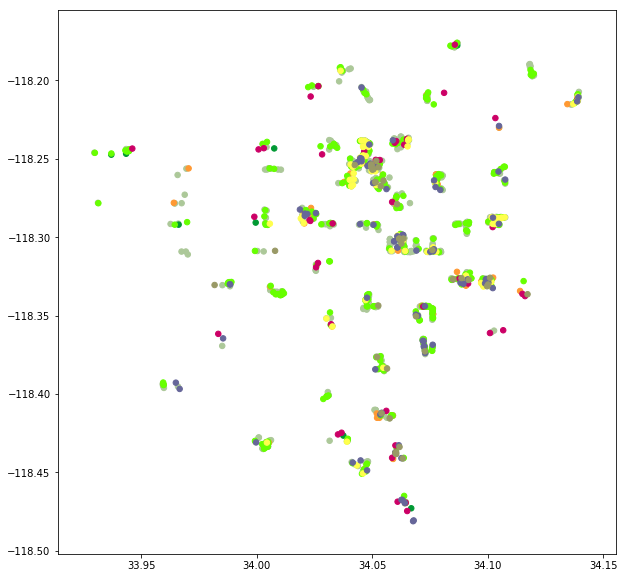

In [45]:
colors = df_venues['Color'].tolist()
Latitude = df_venues['Venue Latitude'].tolist()
Longitude = df_venues['Venue Longitude'].tolist()
plt.figure(figsize=(10,10))
plt.scatter(Latitude, Longitude, s= 30 , c=colors)

### Adding Population By Zip Code

In [46]:
df_venues.head()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent Category,Color
0,90001,33.96833,-118.260640,Polo Loco,33.965819,-118.260294,American Restaurant,Food,#ACC899
1,90008,34.01004,-118.331745,"Quick ""N"" Split",34.007165,-118.334698,American Restaurant,Food,#ACC899
2,90014,34.04310,-118.251960,LA Café,34.044999,-118.251879,American Restaurant,Food,#ACC899
3,90014,34.04310,-118.251960,TBLA CATERING & CAFE,34.041612,-118.251415,American Restaurant,Food,#ACC899
4,90015,34.03891,-118.262935,Stella's Food & Cocktails,34.041063,-118.267524,American Restaurant,Food,#ACC899


In [47]:
df_venues['Zip_code'] = df_venues['Zip_code'].astype(str)
df['Zip_code'] = df['Zip_code'].astype(str)

df_venues = pd.merge(df_venues, df[['Zip_code','Total Population']], on='Zip_code', how='inner')
df_venues.rename(columns={"Total Population": "TotalPopulation"}, inplace = True)
df_venues.head()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent Category,Color,TotalPopulation
0,90001,33.96833,-118.260640,Polo Loco,33.965819,-118.260294,American Restaurant,Food,#ACC899,97352.048058
1,90001,33.96833,-118.260640,Mi Lindo Nayarit,33.969612,-118.256263,Seafood Restaurant,Food,#ACC899,97352.048058
2,90001,33.96833,-118.260640,"Selena ""Anything for Selenas"" Mural",33.970580,-118.256079,Street Art,Entertainment,#ff9933,97352.048058
3,90008,34.01004,-118.331745,"Quick ""N"" Split",34.007165,-118.334698,American Restaurant,Food,#ACC899,55105.929917
4,90008,34.01004,-118.331745,Charleys Philly Steaks,34.010803,-118.336123,Sandwich Place,Food,#ACC899,55105.929917


In [48]:
lat = 34.05223
lon = -118.24368
la_map = folium.Map(location=[lat, lon], zoom_start=11)
row = 0

venues = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, borough, neighborhood in zip(df_venues['Venue Latitude'], df_venues['Venue Longitude'], df_venues['Venue'], df_venues['Zip_code']):
    color_ = df_venues.iloc[row].Color
    circle_size = df_venues.iloc[row].TotalPopulation/10000
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=circle_size,
        popup=label,
        color=color_,
        fill=True,
        fill_color=color_,
        fill_opacity=0.7,
        parse_html=False).add_to(la_map)  
    row = row + 1
la_map

In [49]:
df_venues['TotalPopulation'] = df_venues[['TotalPopulation']].astype(int)
df_venues.dtypes

Zip_code            object
Latitude           float64
Longitude          float64
Venue               object
Venue Latitude     float64
Venue Longitude    float64
Venue Category      object
Parent Category     object
Color               object
TotalPopulation      int64
dtype: object

In [50]:
df_venues.head()

,Zip_code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent Category,Color,TotalPopulation
0,90001,33.96833,-118.260640,Polo Loco,33.965819,-118.260294,American Restaurant,Food,#ACC899,97352
1,90001,33.96833,-118.260640,Mi Lindo Nayarit,33.969612,-118.256263,Seafood Restaurant,Food,#ACC899,97352
2,90001,33.96833,-118.260640,"Selena ""Anything for Selenas"" Mural",33.970580,-118.256079,Street Art,Entertainment,#ff9933,97352
3,90008,34.01004,-118.331745,"Quick ""N"" Split",34.007165,-118.334698,American Restaurant,Food,#ACC899,55105
4,90008,34.01004,-118.331745,Charleys Philly Steaks,34.010803,-118.336123,Sandwich Place,Food,#ACC899,55105


In [51]:
data = df_venues[['Zip_code','Venue','Parent Category']].groupby(['Zip_code','Parent Category'], as_index = False).count()
data_unpivot = data.copy()
data.head()

,Zip_code,Parent Category,Venue
0,90001,Entertainment,1
1,90001,Food,2
2,90002,Business Services,1
3,90002,Food,3
4,90002,Public Venue,1


In [52]:
data = data.pivot(index='Zip_code', columns='Parent Category', values = 'Venue')
#data = data.fillna(0)
#data = data.astype(int)
data.head()

Parent Category,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store
Zip_code,,,,,,,,
90001,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
90002,1.0,NaN,3.0,NaN,NaN,1.0,NaN,5.0
90003,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
90004,1.0,NaN,19.0,7.0,4.0,NaN,1.0,6.0
90005,NaN,1.0,16.0,2.0,4.0,NaN,1.0,2.0


In [53]:
data.reset_index(level=0, inplace=True)
#data = data.iloc[:,1:9]
#data.rename_axis(index={'Parent Category': ' '})
data.head()

Parent Category,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store
0,90001,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,90002,1.0,NaN,3.0,NaN,NaN,1.0,NaN,5.0
2,90003,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
3,90004,1.0,NaN,19.0,7.0,4.0,NaN,1.0,6.0
4,90005,NaN,1.0,16.0,2.0,4.0,NaN,1.0,2.0


In [54]:
dta = pd.merge(data, df[['Zip_code','Total Population']], on='Zip_code', how='inner')
dta.head()

,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store,Total Population
0,90001,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,97352.048058
1,90002,1.0,NaN,3.0,NaN,NaN,1.0,NaN,5.0,87316.826435
2,90003,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,112959.741142
3,90004,1.0,NaN,19.0,7.0,4.0,NaN,1.0,6.0,105994.577977
4,90005,NaN,1.0,16.0,2.0,4.0,NaN,1.0,2.0,64232.577883


In [55]:
#dta = dta.astype(int)

In [56]:
dta.head()

,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store,Total Population
0,90001,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,97352.048058
1,90002,1.0,NaN,3.0,NaN,NaN,1.0,NaN,5.0,87316.826435
2,90003,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,112959.741142
3,90004,1.0,NaN,19.0,7.0,4.0,NaN,1.0,6.0,105994.577977
4,90005,NaN,1.0,16.0,2.0,4.0,NaN,1.0,2.0,64232.577883


In [57]:
dta['Venues'] = dta.iloc[:,1:9].sum(axis=1)

In [58]:
dta.head()

,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store,Total Population,Venues
0,90001,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,97352.048058,3.0
1,90002,1.0,NaN,3.0,NaN,NaN,1.0,NaN,5.0,87316.826435,10.0
2,90003,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,112959.741142,5.0
3,90004,1.0,NaN,19.0,7.0,4.0,NaN,1.0,6.0,105994.577977,38.0
4,90005,NaN,1.0,16.0,2.0,4.0,NaN,1.0,2.0,64232.577883,26.0


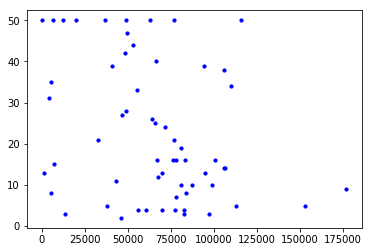

In [59]:
y = dta.Venues.tolist()
x = dta['Total Population'].tolist()
plt.scatter(x, y, s=10, c='b')

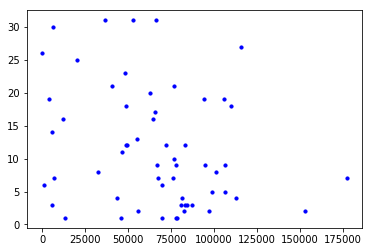

In [60]:
y = dta.Food.tolist()
x = dta['Total Population'].tolist()
plt.scatter(x, y, s=10, c='b')

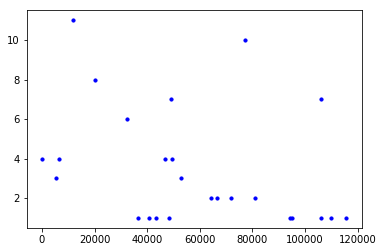

In [61]:
y = dta.Liqueur.tolist()
x = dta['Total Population'].tolist()
plt.scatter(x, y, s=10, c='b')

In [62]:
dta = dta.fillna(0)
dta = dta.astype(int)

In [63]:
#project.save_data("data_1.csv", dta.to_csv())

In [64]:
temp = pd.read_csv('https://data.lacity.org/api/views/r4uk-afju/rows.csv?accessType=DOWNLOAD')
temp.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,...,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,Neighborhood Councils (Certified),LA Specific Plans,Precinct Boundaries,Council Districts,Census Tracts,Zip Codes
0,0000279984-0001-1,WILLIAM K GUERRERO,NaN,12115 MCLENNAN AVENUE,GRANADA HILLS,91344-1718,12115 MCLENNAN 91344-1718,NaN,NaN,NaN,...,12,05/11/2001,12/31/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0002007827-0001-3,BELINDA S CHENG,NaN,720 HAMPTON DRIVE,VENICE,90291-3019,720 HAMPTON 90291-3019,NaN,NaN,NaN,...,11,01/01/2005,12/31/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000357819-0001-8,KANG H LEE,NaN,3454 W 1ST STREET,LOS ANGELES,90004-,3454 1ST 90004,NaN,NaN,NaN,...,13,01/01/1992,09/30/1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000883004-0001-3,SERIGNE S MBAYE,NaN,345 S ALEXANDRIA AVENUE APARTMENT #321,LOS ANGELES,90020-2690,345 ALEXANDRIA 90020-2690,NaN,NaN,NaN,...,4,01/01/2004,12/31/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000423934-0001-8,JERRY HERNANDEZ,NaN,1242 N EVERGREEN AVENUE,LOS ANGELES,90033-2011,1242 EVERGREEN 90033,NaN,NaN,NaN,...,14,05/08/2001,12/31/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
temp.dtypes

LOCATION ACCOUNT #                    object
BUSINESS NAME                         object
DBA NAME                              object
STREET ADDRESS                        object
CITY                                  object
ZIP CODE                              object
LOCATION DESCRIPTION                  object
MAILING ADDRESS                       object
MAILING CITY                          object
MAILING ZIP CODE                      object
NAICS                                float64
PRIMARY NAICS DESCRIPTION             object
COUNCIL DISTRICT                       int64
LOCATION START DATE                   object
LOCATION END DATE                     object
LOCATION                              object
Neighborhood Councils (Certified)    float64
LA Specific Plans                    float64
Precinct Boundaries                  float64
Council Districts                    float64
Census Tracts                        float64
Zip Codes                            float64
dtype: obj

In [66]:
active_business = temp[['ZIP CODE','PRIMARY NAICS DESCRIPTION']]

In [67]:
active_business.head()

,ZIP CODE,PRIMARY NAICS DESCRIPTION
0,91344-1718,NaN
1,90291-3019,NaN
2,90004-,NaN
3,90020-2690,NaN
4,90033-2011,NaN


In [68]:
temp_zips = active_business['ZIP CODE'].str.split("-", n = 1, expand = True)

In [69]:
temp_zips.head()

,0,1
0,91344,1718
1,90291,3019
2,90004,
3,90020,2690
4,90033,2011


In [70]:
temp_zips.drop(columns=[1],axis=0, inplace =True)
temp_zips.head()

,0
0,91344
1,90291
2,90004
3,90020
4,90033


In [71]:
temp_zips['NAICS'] =  active_business['PRIMARY NAICS DESCRIPTION']
temp_zips.head()

,0,NAICS
0,91344,NaN
1,90291,NaN
2,90004,NaN
3,90020,NaN
4,90033,NaN


In [72]:
active_business = temp_zips
active_business.rename(columns={0:'Zip_code'}, inplace=True)
active_business.head(5)

,Zip_code,NAICS
0,91344,NaN
1,90291,NaN
2,90004,NaN
3,90020,NaN
4,90033,NaN


In [73]:
active_business.shape

(1346120, 2)

In [74]:
active_business.dropna(inplace = True)

In [75]:
active_business.head()



,Zip_code,NAICS
11,91405,Barber shops
14,91303,Offices of physicians (except mental health sp...
19,90065,Multifamily Housing Construction (1997 NAICS)
20,90731,All other personal services
22,90038,Photographic services


In [76]:
active_business['Quantity'] = 1

In [77]:
active_business.head()

,Zip_code,NAICS,Quantity
11,91405,Barber shops,1
14,91303,Offices of physicians (except mental health sp...,1
19,90065,Multifamily Housing Construction (1997 NAICS),1
20,90731,All other personal services,1
22,90038,Photographic services,1


In [78]:
pf_zc_la.head()
zc2m = pf_zc_la.copy()
zc2m.head()

,Zip Code
0,90001
1,90002
2,90003
3,90004
4,90005


In [79]:
zc2m.rename(columns={'Zip Code':'Zip_code'}, inplace=True)
zc2m.head()

,Zip_code
0,90001
1,90002
2,90003
3,90004
4,90005


In [80]:
active_business['Zip_code'] = active_business['Zip_code'].astype(str)
zc2m['Zip_code'] = zc2m['Zip_code'].astype(str)

active_business = pd.merge(active_business, zc2m, on='Zip_code', how='inner')

In [81]:
active_business = active_business.groupby(['Zip_code', 'NAICS'], as_index = False).count()

In [82]:
active_business = active_business.groupby(['Zip_code', 'NAICS'], as_index=False).count()

In [83]:
active_business.head()

,Zip_code,NAICS,Quantity
0,90001,Activities related to credit intermediation (i...,1
1,90001,Advertising & related services,1
2,90001,"Agents & managers for artists, athletes, enter...",1
3,90001,All other miscellaneous store retailers (inclu...,1
4,90001,All other motor vehicle dealers,1


In [84]:
NAICS = active_business.copy()

In [85]:
NAICS.drop(columns='Zip_code',axis=0, inplace =True)

In [86]:
NACIS = NAICS.groupby('NAICS', as_index=False).count()

In [87]:
NACIS['Parent Category'] = ''

In [88]:
NACIS.head()

,NAICS,Quantity,Parent Category
0,Activities related to credit intermediation (i...,61,
1,Advertising & related services,64,
2,"Agents & managers for artists, athletes, enter...",59,
3,All other miscellaneous store retailers (inclu...,64,
4,All other motor vehicle dealers,52,


In [150]:
# The code was removed by Watson Studio for sharing.

,NAICS,Quantity,Parent Category


In [90]:
NACIS.head(20)

,NAICS,Quantity,Parent Category
0,Activities related to credit intermediation (i...,61,Business Services
1,Advertising & related services,64,Business Services
2,"Agents & managers for artists, athletes, enter...",59,Business Services
3,All other miscellaneous store retailers (inclu...,64,Store
4,All other motor vehicle dealers,52,Business Services
5,All other personal services,67,Business Services
6,"All other professional, scientific, & technica...",64,Business Services
7,All other specialty trade contractors,61,Business Services
8,Amusement parks & arcades,17,Entertainment
9,Animal Slaughtering and Processing,9,Food


In [91]:
NACIS.groupby('Parent Category').sum()

,Quantity
Parent Category,
Business Services,5991
Entertainment,135
Food,195
Goods,1810
Liqueur,147
No category,62
Personal Services,398
Public Venue,177
Rental Services,1722


In [92]:
active_business.head()

,Zip_code,NAICS,Quantity
0,90001,Activities related to credit intermediation (i...,1
1,90001,Advertising & related services,1
2,90001,"Agents & managers for artists, athletes, enter...",1
3,90001,All other miscellaneous store retailers (inclu...,1
4,90001,All other motor vehicle dealers,1


In [93]:
active_business.drop(columns=['Quantity'],axis=0, inplace =True)

In [94]:
new_venues = pd.merge(active_business, NACIS, on='NAICS', how='inner')

In [95]:
new_venues.head()

,Zip_code,NAICS,Quantity,Parent Category
0,90001,Activities related to credit intermediation (i...,61,Business Services
1,90002,Activities related to credit intermediation (i...,61,Business Services
2,90003,Activities related to credit intermediation (i...,61,Business Services
3,90004,Activities related to credit intermediation (i...,61,Business Services
4,90005,Activities related to credit intermediation (i...,61,Business Services


In [96]:
new_venues.drop(columns=['Quantity'],axis=0, inplace =True)

In [97]:
new_venues.head()

,Zip_code,NAICS,Parent Category
0,90001,Activities related to credit intermediation (i...,Business Services
1,90002,Activities related to credit intermediation (i...,Business Services
2,90003,Activities related to credit intermediation (i...,Business Services
3,90004,Activities related to credit intermediation (i...,Business Services
4,90005,Activities related to credit intermediation (i...,Business Services


In [98]:
dta.head()

,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store,Total Population,Venues
0,90001,0,1,2,0,0,0,0,0,97352,3
1,90002,1,0,3,0,0,1,0,5,87316,10
2,90003,0,1,4,0,0,0,0,0,112959,5
3,90004,1,0,19,7,4,0,1,6,105994,38
4,90005,0,1,16,2,4,0,1,2,64232,26


In [99]:
data_pca_1 = dta.copy()

In [100]:
data_pca_1.drop(columns=['Venues'],axis=0, inplace =True)

In [101]:
data_pca_1.head()

,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store,Total Population
0,90001,0,1,2,0,0,0,0,0,97352
1,90002,1,0,3,0,0,1,0,5,87316
2,90003,0,1,4,0,0,0,0,0,112959
3,90004,1,0,19,7,4,0,1,6,105994
4,90005,0,1,16,2,4,0,1,2,64232


In [102]:
#data_pca_1.pivot(index='Zip_code', columns='Total Population')

In [103]:
data.head()

Parent Category,Zip_code,Business Services,Entertainment,Food,Liqueur,Personal Services,Public Venue,Rental Services,Store
0,90001,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,90002,1.0,NaN,3.0,NaN,NaN,1.0,NaN,5.0
2,90003,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
3,90004,1.0,NaN,19.0,7.0,4.0,NaN,1.0,6.0
4,90005,NaN,1.0,16.0,2.0,4.0,NaN,1.0,2.0


In [104]:
data_unpivot.head()

,Zip_code,Parent Category,Venue
0,90001,Entertainment,1
1,90001,Food,2
2,90002,Business Services,1
3,90002,Food,3
4,90002,Public Venue,1


In [105]:
data_unpivot.shape

(255, 3)

In [106]:
data_pivot = data_unpivot.pivot(index='Parent Category', columns='Zip_code', values = 'Venue')
data_pivot.reset_index(level=0, inplace=True)
data_pivot.head()

Zip_code,Parent Category,90001,90002,90003,90004,90005,90006,90007,90008,90010,...,90062,90063,90064,90065,90066,90067,90068,90071,90073,90089
0,Business Services,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,Entertainment,1.0,NaN,1.0,NaN,1.0,1.0,NaN,2.0,1.0,...,NaN,NaN,NaN,1.0,1.0,4.0,1.0,1.0,NaN,3.0
2,Food,2.0,3.0,4.0,19.0,16.0,8.0,6.0,13.0,30.0,...,2.0,9.0,4.0,1.0,19.0,19.0,NaN,26.0,6.0,14.0
3,Liqueur,NaN,NaN,NaN,7.0,2.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,4.0,NaN,3.0
4,Personal Services,NaN,NaN,NaN,4.0,4.0,2.0,NaN,NaN,7.0,...,NaN,NaN,NaN,1.0,1.0,2.0,NaN,3.0,3.0,5.0


In [107]:
data_pivot.rename(columns={0:''}, inplace=True)

In [108]:
data_pivot.fillna(0, inplace=True)

In [109]:
data_pivot.iloc[:,1:200] = data_pivot.iloc[:,1:200].astype(float)

In [110]:
data_pivot

Zip_code,Parent Category,90001,90002,90003,90004,90005,90006,90007,90008,90010,...,90062,90063,90064,90065,90066,90067,90068,90071,90073,90089
0,Business Services,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Entertainment,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,3.0
2,Food,2.0,3.0,4.0,19.0,16.0,8.0,6.0,13.0,30.0,...,2.0,9.0,4.0,1.0,19.0,19.0,0.0,26.0,6.0,14.0
3,Liqueur,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,4.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
4,Personal Services,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,7.0,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,3.0,3.0,5.0
5,Public Venue,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,1.0,2.0,5.0,2.0,3.0
6,Rental Services,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,0.0
7,Store,0.0,5.0,0.0,6.0,2.0,5.0,5.0,18.0,6.0,...,1.0,3.0,3.0,0.0,16.0,3.0,1.0,3.0,2.0,7.0


In [111]:
from sklearn.decomposition import PCA

In [112]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = data_pivot.iloc[:,1:200].values
# Separating out the target
y = df.iloc[:,0].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [113]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [114]:
finalDf = pd.concat([principalDf, data_pivot[['Parent Category']]], axis = 1)


In [115]:
finalDf

,principal component 1,principal component 2,Parent Category
0,-4.538260,0.884087,Business Services
1,-3.248787,-0.830000,Entertainment
2,15.426759,-2.924241,Food
3,-2.915987,-0.379192,Liqueur
4,-3.160501,-2.065569,Personal Services
5,-3.341941,-0.301245,Public Venue
6,-4.375784,-0.305968,Rental Services
7,6.154500,5.922129,Store


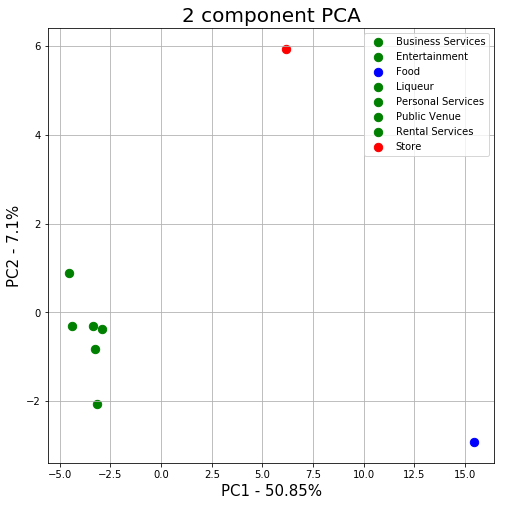

In [116]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1 - 50.85%', fontsize = 15)
ax.set_ylabel('PC2 - 7.1%', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Business Services', 'Entertainment', 'Food', 'Liqueur', 'Personal Services', 'Public Venue','Rental Services', 'Store']
colors = ['g','g','b','g','g','g','g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Parent Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 70)
ax.legend(targets)
ax.grid()

In [117]:
pca.explained_variance_

array([ 50.83157187,   7.09829029])

In [118]:
new_venues['Quantity'] = 1
new_venues.drop(columns=['NAICS'],axis=0, inplace =True)
new_venues.head()

,Zip_code,Parent Category,Quantity
0,90001,Business Services,1
1,90002,Business Services,1
2,90003,Business Services,1
3,90004,Business Services,1
4,90005,Business Services,1


In [119]:
new_venues2 = new_venues.groupby(['Zip_code', 'Parent Category'], as_index=False).count()

In [120]:
data_pivot2 = new_venues2.pivot(index='Parent Category', columns='Zip_code', values = 'Quantity')
data_pivot2.reset_index(level=0, inplace=True)
data_pivot2.fillna(0, inplace=True)
data_pivot2

Zip_code,Parent Category,90001,90002,90003,90004,90005,90006,90007,90008,90009,...,90078,90079,90081,90083,90086,90089,90091,90093,90095,90189
0,Business Services,81.0,81.0,98.0,106.0,104.0,110.0,98.0,89.0,4.0,...,4.0,29.0,2.0,1.0,3.0,20.0,0.0,2.0,15.0,0.0
1,Entertainment,0.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Food,2.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
3,Goods,36.0,24.0,33.0,33.0,27.0,32.0,33.0,23.0,1.0,...,1.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
4,Liqueur,3.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,No category,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,Personal Services,5.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,Public Venue,3.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,1.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
8,Rental Services,23.0,21.0,26.0,33.0,29.0,33.0,28.0,30.0,1.0,...,0.0,6.0,1.0,0.0,0.0,3.0,0.0,1.0,3.0,1.0
9,Store,41.0,34.0,49.0,49.0,47.0,50.0,47.0,46.0,3.0,...,0.0,19.0,1.0,0.0,2.0,11.0,1.0,0.0,3.0,0.0


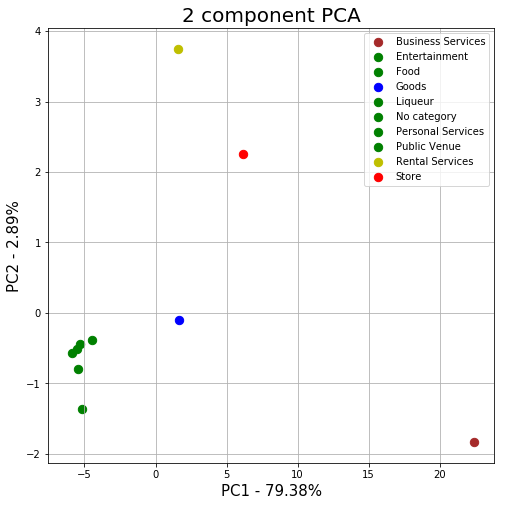

In [121]:
# Separating out the features
x = data_pivot2.iloc[:,1:200].values
# Separating out the target
y = df.iloc[:,0].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data_pivot2[['Parent Category']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1 - 79.38%', fontsize = 15)
ax.set_ylabel('PC2 - 2.89%', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = data_pivot2['Parent Category'].tolist()
colors = ['brown','g','g','b','g','g','g','g','y','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Parent Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 70)
ax.legend(targets)
ax.grid()

In [122]:
finalDf

,principal component 1,principal component 2,Parent Category
0,22.408477,-1.838200,Business Services
1,-5.448211,-0.791649,Entertainment
2,-5.153435,-1.367066,Food
3,1.617582,-0.095062,Goods
4,-5.530913,-0.507459,Liqueur
5,-5.851534,-0.571890,No category
6,-4.477655,-0.382438,Personal Services
7,-5.293003,-0.448137,Public Venue
8,1.552294,3.745766,Rental Services
9,6.176397,2.256135,Store


In [123]:
pca.explained_variance_

array([ 79.38350341,   2.88179523])

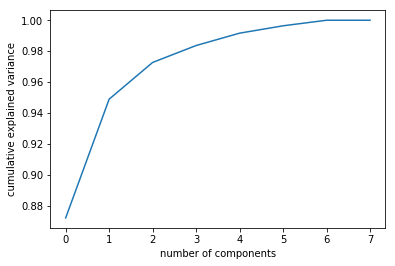

In [124]:
pca = PCA().fit(data_pivot.iloc[:,3:80].values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

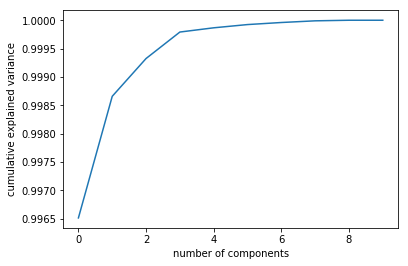

In [125]:
pca = PCA().fit(data_pivot2.iloc[:,3:80].values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## After applying PCA in order to undestand better our Parent Category, let's take the 4 principal categories and compare them with the population within it's zip code.

### Business Services

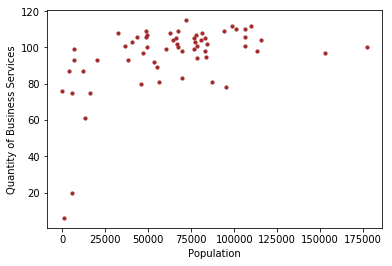

In [137]:
BS = new_venues2.loc[new_venues2['Parent Category']=='Business Services'].copy()
BS.drop(columns=['Parent Category'], index = 0 , inplace = True)
BS['Zip_code'] = BS['Zip_code'].astype(str)
df['Zip_code'] = df['Zip_code'].astype(str)

BS = pd.merge(BS, df[['Zip_code','Total Population']], on='Zip_code', how='inner')
BS.rename(columns={"Total Population": "TotalPopulation"}, inplace = True)
y = BS.Quantity.tolist()
x = BS.TotalPopulation.tolist()
plt.scatter(x, y, s=10, c='brown')
plt.xlabel('Population')
plt.ylabel('Quantity of Business Services');

### Store

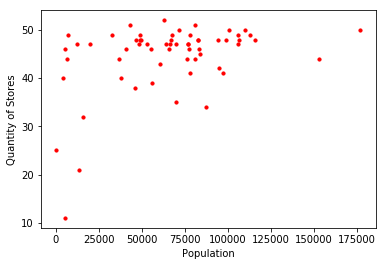

In [141]:
STORE = new_venues2.loc[new_venues2['Parent Category']=='Store'].copy()
#STORE.drop(columns=['Parent Category'], index = 0 , inplace = True)
#STORE
STORE['Zip_code'] = STORE['Zip_code'].astype(str)
STORE = pd.merge(STORE, df[['Zip_code','Total Population']], on='Zip_code', how='inner')
STORE.rename(columns={"Total Population": "TotalPopulation"}, inplace = True)
y = STORE.Quantity.tolist()
x = STORE.TotalPopulation.tolist()
plt.xlabel('Population')
plt.ylabel('Quantity of Stores');
plt.scatter(x, y, s=10, c='r')


### Rental Services


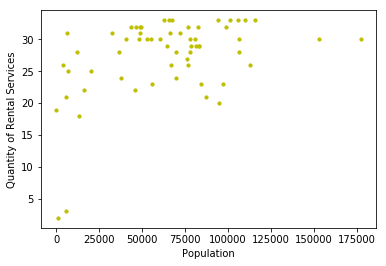

In [145]:
RS = new_venues2.loc[new_venues2['Parent Category']=='Rental Services'].copy()
#STORE.drop(columns=['Parent Category'], index = 0 , inplace = True)
#STORE
RS['Zip_code'] = RS['Zip_code'].astype(str)
RS = pd.merge(RS, df[['Zip_code','Total Population']], on='Zip_code', how='inner')
RS.rename(columns={"Total Population": "TotalPopulation"}, inplace = True)
y = RS.Quantity.tolist()
x = RS.TotalPopulation.tolist()
plt.xlabel('Population')
plt.ylabel('Quantity of Rental Services');
plt.scatter(x, y, s=10, c='y')

In [143]:
RS.head()

,Zip_code,Parent Category,Quantity,TotalPopulation
0,90001,Rental Services,23,97352.048058
1,90002,Rental Services,21,87316.826435
2,90003,Rental Services,26,112959.741142
3,90004,Rental Services,33,105994.577977
4,90005,Rental Services,29,64232.577883


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
#X = preprocessing.StandardScaler().fit(X).transform(X)
#y = np.asarray(churn_df['churn'])

x = RS[['TotalPopulation']].values
y = RS['Quantity']

#x = RS[['Quantity','TotalPopulation']].values
#y = RS['Zip_code']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

yhat

array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30])

In [131]:
RS['Quantity'].describe()

count    61.000000
mean     27.442623
std       6.111532
min       2.000000
25%      25.000000
50%      29.000000
75%      31.000000
max      33.000000
Name: Quantity, dtype: float64

### Food

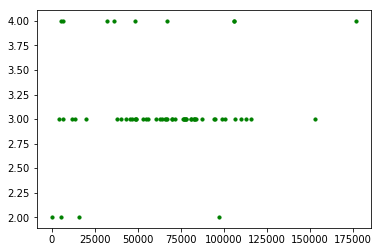

In [132]:
FOOD = new_venues2.loc[new_venues2['Parent Category']=='Food'].copy()
#STORE.drop(columns=['Parent Category'], index = 0 , inplace = True)
#STORE
FOOD['Zip_code'] = FOOD['Zip_code'].astype(str)
FOOD = pd.merge(FOOD, df[['Zip_code','Total Population']], on='Zip_code', how='inner')
FOOD.rename(columns={"Total Population": "TotalPopulation"}, inplace = True)
y = FOOD.Quantity.tolist()
x = FOOD.TotalPopulation.tolist()
plt.scatter(x, y, s=10, c='g')

In [133]:
FOOD.head()

,Zip_code,Parent Category,Quantity,TotalPopulation
0,90001,Food,2,97352.048058
1,90002,Food,3,87316.826435
2,90003,Food,3,112959.741142
3,90004,Food,4,105994.577977
4,90005,Food,3,64232.577883


In [134]:
NACIS.loc[NACIS['Parent Category']=='Food']

,NAICS,Quantity,Parent Category
9,Animal Slaughtering and Processing,9,Food
18,Bakeries & tortilla mfg.,57,Food
90,Full-service restaurants,65,Food
132,Limited-service eating places,64,Food


In [135]:
FOOD.Quantity.describe()

count    60.000000
mean      3.083333
std       0.461819
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Quantity, dtype: float64

In [136]:
NACIS.loc[NACIS['Parent Category']=='Food'].Quantity.sum()

195